In [4]:
#Importing Libraries
# Supress Warnings

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [6]:
#Import Dataset
df=pd.read_csv('Elon_musk.csv',encoding='latin')
df


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

In [8]:
# apply text preprocessing
df['Text'] = df.Text.map(lambda x : x.lower())
df['Text']


0                                  @kunalb11 im an alien
1       @id_aa_carmack ray tracing on cyberpunk with h...
2                     @joerogan @spotify great interview!
3                         @gtera27 doge is underestimated
4       @teslacn congratulations tesla china for amazi...
                              ...                        
1994    @flcnhvy true, it sounds so surreal, but the n...
1995    @ppathole make sure to read ur terms &amp; con...
1996                  @teslagong @ppathole samwise gamgee
1997    @ppathole altho dumb and dumber is <u+0001f525...
1998                            progress update august 28
Name: Text, Length: 1999, dtype: object

In [9]:
# remove both the leading and the trailing characters
df=[Text.strip() for Text in df.Text]


In [10]:
#removes empty strings, because they are considered in Python as False
df=[Text for Text in df if Text]
df[0:10]


['@kunalb11 i\x92m an alien',
 '@id_aa_carmack ray tracing on cyberpunk with hdr is next-level. have you tried it?',
 '@joerogan @spotify great interview!',
 '@gtera27 doge is underestimated',
 '@teslacn congratulations tesla china for amazing execution last year. now on to the next for even more!!',
 'happy new year of the ox! https://t.co/9wfkmyu2oj',
 'frodo was the underdoge,\nall thought he would fail,\nhimself most of all. https://t.co/zgxjfdzzrm',
 '@owensparks_ @flcnhvy @anonyx10 haha thanks :)',
 '@flcnhvy @anonyx10 indeed! tweets definitely do not represent real-world time allocation.',
 'the most entertaining outcome is the most likely']

In [11]:
# Joining the list into one string/text
text = ' '.join(df)
text
type(text)
len(text)

158702

In [12]:
#Generate wordcloud
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [13]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(15, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

In [14]:
# Generate wordcloud
type(STOPWORDS)
stopwords = STOPWORDS
len(stopwords)
text
type(text)


str

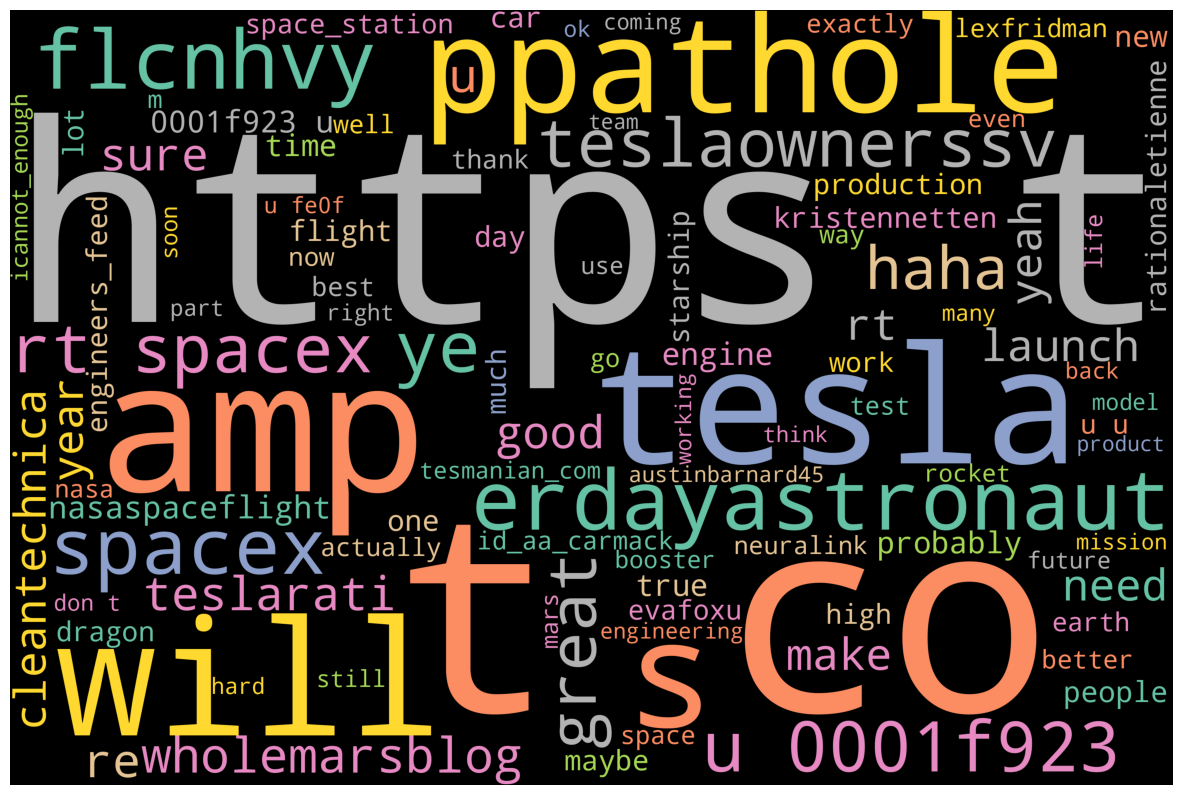

In [15]:
# Plot
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

In [16]:
#text preprocessing start
#Punctuation
import string # special operations on strings
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'kunalb11 i\x92m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview gtera27 doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox httpstco9wfkmyu2oj frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy anonyx10 haha thanks  flcnhvy anonyx10 indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest httpstco3rwe9uhsts geoffkeighley unrealengine it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u0001f923u0001f923 this is true power haha httpstcofc9uhqsd7o freewal

In [39]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
len(text_tokens)
print(text_tokens[0:50])


['kunalb11', 'i\x92m', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'httpstco9wfkmyu2oj', 'frodo']


In [20]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords

In [21]:
#nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
len(no_stop_tokens)
print(no_stop_tokens[0:40])


[nltk_data] Downloading package stopwords to /root/nltk_data...


['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
# joining the words in to single document
doc = ' '.join(my_stop_words)
doc
print(doc[0:40])

i me my myself we our ours ourselves you


In [28]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
Lemmatizer = WordNetLemmatizer()

lemmas = []
for token in doc.split():
    lemmas.append(Lemmatizer.lemmatize(token))

print(lemmas)
type(lemmas)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'it', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'wa', 'were', 'be', 'been', 'being', 'have', 'ha', 'had', 'having', 'do', 'doe', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'a', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',

list

In [29]:
#text preprocessing end
#feature extraction start
# how we converted in features
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
X

<179x143 sparse matrix of type '<class 'numpy.int64'>'
	with 175 stored elements in Compressed Sparse Row format>

In [30]:
# every word and its position in the X
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(30)
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True)
print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names_out()[0:11])
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])


{'me': 66, 'my': 71, 'myself': 72, 'we': 123, 'our': 85, 'ours': 86, 'ourselves': 87, 'you': 138, 're': 91, 've': 119, 'll': 64, 'your': 139, 'yours': 140, 'yourself': 141, 'yourselves': 142, 'he': 47, 'him': 52, 'his': 54, 'himself': 53, 'she': 94, 'her': 48, 'hers': 50, 'herself': 51, 'it': 61, 'itself': 62, 'they': 110, 'them': 105, 'their': 103, 'theirs': 104, 'themselves': 106, 'what': 126, 'which': 129, 'who': 131, 'whom': 132, 'this': 111, 'that': 101, 'these': 109, 'those': 112, 'am': 7, 'is': 59, 'are': 11, 'wa': 121, 'were': 124, 'be': 14, 'been': 16, 'being': 18, 'have': 44, 'ha': 40, 'had': 41, 'having': 46, 'do': 28, 'doe': 29, 'did': 26, 'doing': 31, 'an': 8, 'the': 102, 'and': 9, 'but': 22, 'if': 56, 'or': 83, 'because': 15, 'until': 117, 'while': 130, 'of': 78, 'at': 13, 'by': 23, 'for': 37, 'with': 135, 'about': 0, 'against': 4, 'between': 20, 'into': 58, 'through': 113, 'during': 34, 'before': 17, 'after': 2, 'above': 1, 'below': 19, 'to': 114, 'from': 38, 'up': 118, 

In [31]:
#feature extraction end

#identifying combination of words, bigram,s trigrams
#Let's see how can bigrams and trigrams can be included here
#Bigram
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,1),max_features = 120)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df)
bow_matrix_ngram
type(df)

print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())


['0001f923' 'about' 'ajtourville' 'all' 'also' 'amp' 'an' 'and' 'are' 'as'
 'at' 'be' 'best' 'but' 'by' 'can' 'cleantechnica' 'co' 'coming' 'could'
 'crew' 'day' 'do' 'dragon' 'earth' 'engineers_feed' 'ercxspace'
 'erdayastronaut' 'evafoxu' 'falcon' 'felixschlang' 'few' 'first'
 'flcnhvy' 'for' 'from' 'get' 'good' 'great' 'haha' 'has' 'have' 'he'
 'high' 'https' 'id_aa_carmack' 'if' 'in' 'is' 'it' 'just' 'kristennetten'
 'launch' 'like' 'lot' 'make' 'marcushousegame' 'maybe' 'model' 'more'
 'most' 'much' 'my' 'nasa' 'nasaspaceflight' 'need' 'new' 'next' 'no'
 'not' 'now' 'of' 'on' 'one' 'only' 'or' 'our' 'out' 'people' 'ppathole'
 'probably' 'production' 'rationaletienne' 're' 'rt' 'should' 'so' 'some'
 'soon' 'space_station' 'spacex' 'starship' 'still' 'sure' 'tesla'
 'teslaownerssv' 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this'
 'time' 'to' 'too' 'true' 'very' 'was' 'we' 'what' 'wholemarsblog' 'will'
 'with' 'would' 'yeah' 'year' 'yes' 'you' 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0

In [32]:
print(vectorizer_ngram_range.get_feature_names_out())
w1 = list(vectorizer_ngram_range.get_feature_names_out())
type(w1)
w2 = ' '.join(w1)
w2
type(w2)
stopwords_list = set(stopwords.words('english'))

['0001f923' 'about' 'ajtourville' 'all' 'also' 'amp' 'an' 'and' 'are' 'as'
 'at' 'be' 'best' 'but' 'by' 'can' 'cleantechnica' 'co' 'coming' 'could'
 'crew' 'day' 'do' 'dragon' 'earth' 'engineers_feed' 'ercxspace'
 'erdayastronaut' 'evafoxu' 'falcon' 'felixschlang' 'few' 'first'
 'flcnhvy' 'for' 'from' 'get' 'good' 'great' 'haha' 'has' 'have' 'he'
 'high' 'https' 'id_aa_carmack' 'if' 'in' 'is' 'it' 'just' 'kristennetten'
 'launch' 'like' 'lot' 'make' 'marcushousegame' 'maybe' 'model' 'more'
 'most' 'much' 'my' 'nasa' 'nasaspaceflight' 'need' 'new' 'next' 'no'
 'not' 'now' 'of' 'on' 'one' 'only' 'or' 'our' 'out' 'people' 'ppathole'
 'probably' 'production' 'rationaletienne' 're' 'rt' 'should' 'so' 'some'
 'soon' 'space_station' 'spacex' 'starship' 'still' 'sure' 'tesla'
 'teslaownerssv' 'teslarati' 'than' 'that' 'the' 'there' 'they' 'this'
 'time' 'to' 'too' 'true' 'very' 'was' 'we' 'what' 'wholemarsblog' 'will'
 'with' 'would' 'yeah' 'year' 'yes' 'you' 'your']


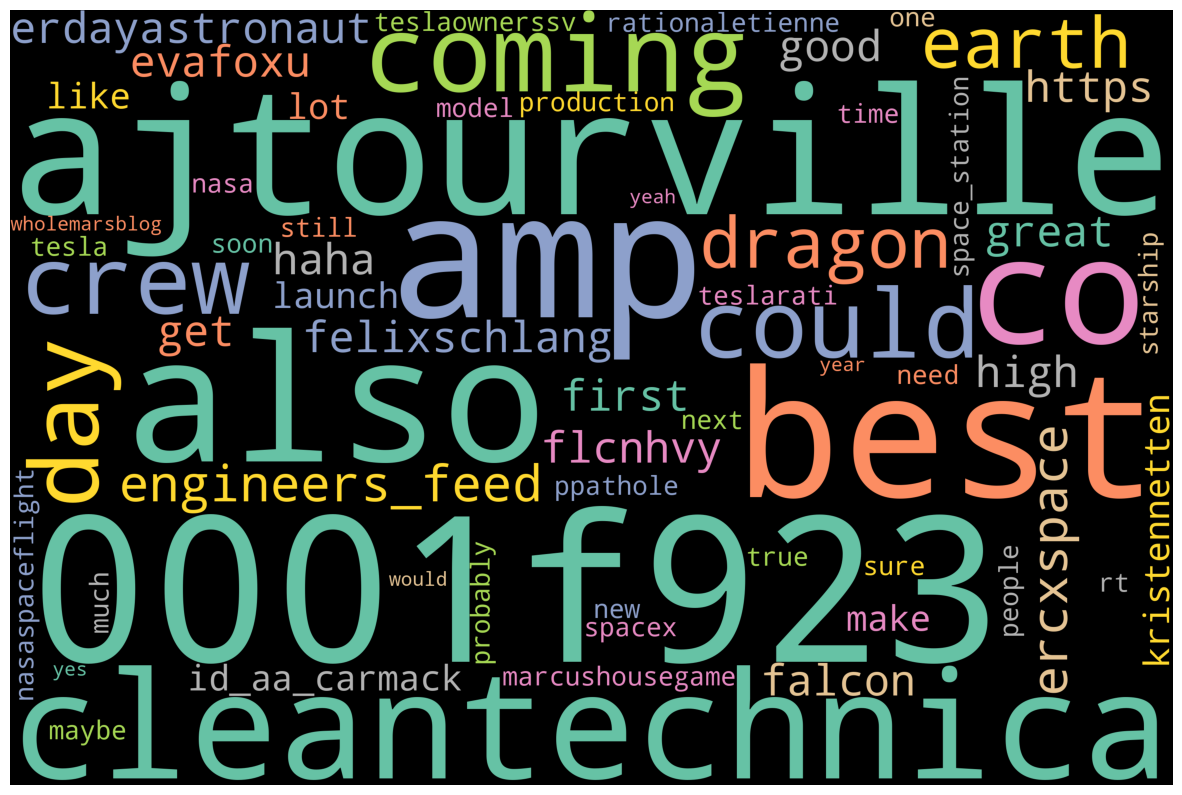

In [33]:
#Plot
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    max_words=120,
    colormap='Set2',
    stopwords=stopwords_list
).generate(w2)
plot_cloud(wordcloud)


In [34]:
#Trigram
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(2,2),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df)
bow_matrix_ngram

print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

w3 = list(vectorizer_ngram_range.get_feature_names_out())
w3
w4 = ' '.join(w3)
w4
stopwords_list = set(stopwords.words('english'))

['0001f923 0001f923' '2192 https' 'at tesla' 'be great' 'but it' 'but we'
 'can be' 'coming soon' 'course still' 'crew dragon' 'ercxspace spacex'
 'erdayastronaut flcnhvy' 'erdayastronaut rweb11742'
 'erdayastronaut spacex' 'falcon first' 'first operational' 'first stage'
 'flcnhvy tesla' 'for sure' 'for the' 'from the' 'giga berlin' 'going to'
 'great game' 'hard to' 'https co' 'if you' 'in the' 'is not' 'is the'
 'is what' 'it https' 'it is' 'it should' 'it was' 'it will'
 'jgrano305 teslaratiteam' 'lot of' 'marcushousegame felixschlang'
 'more than' 'most likely' 'need to' 'neopork85 spacex' 'next week'
 'next year' 'of course' 'of my' 'of the' 'on the' 'one of' 'out of'
 'ppathole thesheetztweetz' 'pretty much' 'raytech247 wholemarsblog'
 'rt nasa' 'rt spacex' 'rt tesla' 'should be' 'spacex crew'
 'spacex falcon' 'static fire' 'still love' 'tesla is' 'teslarati tesla'
 'teslaratiteam teslarati' 'thanks for' 'that is' 'that would' 'the best'
 'the first' 'the future' 'the most' 'the

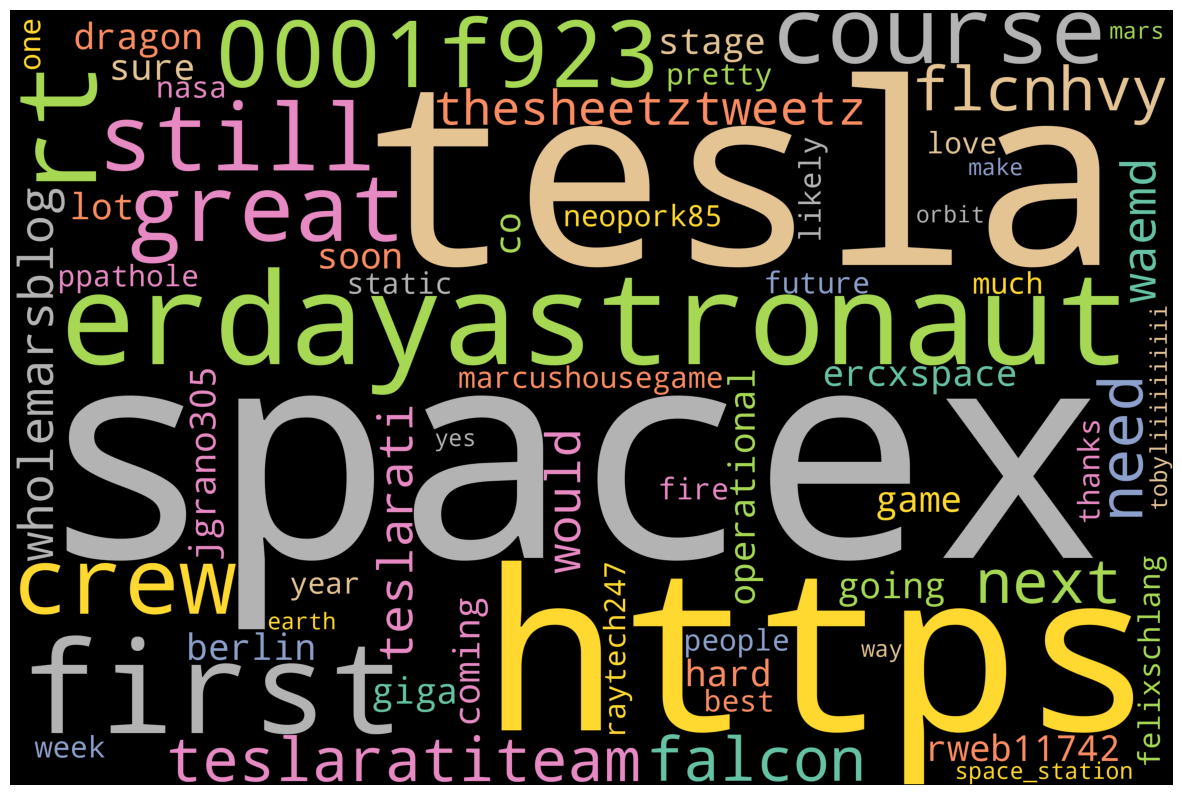

In [35]:
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    max_words=120,
    colormap='Set2',
    stopwords=stopwords_list
).generate(w4)
plot_cloud(wordcloud)

In [40]:
#Sentiment Analysis
#Import Dataset
df=pd.read_csv('Elon_musk.csv',encoding='latin')
df.drop(columns='Unnamed: 0',inplace=True)
df
X=df['Text']
analyzer = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Text'].apply(lambda Text: analyzer.polarity_scores(Text)['compound'])

In [41]:
#Analyze Results
avg_sentiment = df['Sentiment'].mean()
positive_tweets = df[df['Sentiment'] > 0]
negative_tweets = df[df['Sentiment'] < 0]
neutral_tweets = df[df['Sentiment'] == 0]

print("Average Sentiment Score:", avg_sentiment)
print("Number of Positive Tweets:", len(positive_tweets))
print("Number of Negative Tweets:", len(negative_tweets))
print("Number of Neutral Tweets:", len(neutral_tweets))

Average Sentiment Score: 0.1701022511255628
Number of Positive Tweets: 883
Number of Negative Tweets: 232
Number of Neutral Tweets: 884
